### 이미지 다루기
---
- pip install pillow opencv-python matplotlib   
   
- mkdir -p ~/aiffel/python_image_proc  
- wget https://aiffelstaticprd.blob.core.windows.net/media/documents/pillow_practice.png
- mv pillow_practice.png ~/aiffel/python_image_proc
- cifar-100 이미지셋 다운로드
    - wget https://aiffelstaticprd.blob.core.windows.net/media/documents/cifar-100-python.tar.gz 
    - mv cifar-100-python.tar.gz ~/aiffel/python_image_proc
    - cd ~/aiffel/python_image_proc && tar xvzf cifar-100-python.tar.gz
- pip install tqdm


### Pillow 사용법

In [2]:
# 배열을 이미지로 바꿔 화면에 표시 
import numpy as np
from PIL import Image

data = np.zeros([32, 32, 3], dtype=np.uint8)
image = Image.fromarray(data, 'RGB')
image.show()

In [3]:
data[:, :] = [255, 0, 0]
image = Image.fromarray(data, 'RGB')
image.show()

In [4]:
from PIL import Image
import os

# 연습용 파일 경로
image_path = os.getenv('HOME')+'/aiffel/python_image_proc/pillow_practice.png'

# 이미지 열기
img = Image.open(image_path)
img.show()

# width와 height 출력
print(img.width)
print(img.height)

# JPG 파일 형식으로 저장해보기
new_image_path = os.getenv('HOME')+'/aiffel/python_image_proc/pillow_practice.jpg'
img = img.convert('RGB')
img.save(new_image_path)

620
465


In [5]:
# 리사이즈
resized_image = img.resize((100,200))
resized_image.show()

resized_image_path = os.getenv('HOME')+'/aiffel/python_image_proc/pillow_practice_resized.png'
resized_image.save(resized_image_path)

In [6]:
# 이미지 잘라내기
box = (300, 100, 600, 400)
region = img.crop(box)
region.show()

cropped_image_path = os.getenv('HOME')+'/aiffel/python_image_proc/pillow_practice_cropped.png'
region.save(cropped_image_path)

In [7]:
# CIFAR-100 데이터를 받아 개별 이미지 파일로 추출
import os
import pickle

dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/cifar-100-python'
train_file_path = os.path.join(dir_path, 'train')

with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')

print(type(train))
#print(train) 

<class 'dict'>


In [8]:
# byte로 이루어진 키들의 집합
train.keys()

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])

In [9]:
type(train[b'filenames'])

list

In [10]:
train[b'filenames'][0:5]

[b'bos_taurus_s_000507.png',
 b'stegosaurus_s_000125.png',
 b'mcintosh_s_000643.png',
 b'altar_boy_s_001435.png',
 b'cichlid_s_000031.png']

In [11]:
train[b'data'][0:5]

array([[255, 255, 255, ...,  10,  59,  79],
       [255, 253, 253, ..., 253, 253, 255],
       [250, 248, 247, ..., 194, 207, 228],
       [124, 131, 135, ..., 232, 236, 231],
       [ 43,  32,  87, ...,  60,  29,  37]], dtype=uint8)

In [12]:
train[b'data'][0].shape

(3072,)

In [13]:
image_data = train[b'data'][0].reshape([32, 32, 3], order='F')   # order를 F로 해야 rgb의 순서로 처리
image = Image.fromarray(image_data)    # Pillow를 사용하여 Numpy 배열을 Image객체로 만들어서
image.show()    

In [14]:
# x축과 y축이 뒤집혀서 swapaxes를 이용해 바꿔줌
image_data = image_data.swapaxes(0, 1)
image = Image.fromarray(image_data)
image.show()

In [16]:
import os
import pickle
from PIL import Image
import numpy
from tqdm import tqdm

dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/cifar-100-python'
train_file_path = os.path.join(dir_path, 'train')

# image를 저장할 cifar-100-python의 하위 디렉토리(images)를 생성합니다. 
images_dir_path = os.path.join(dir_path, 'images')
if not os.path.exists(images_dir_path):
    os.mkdir(images_dir_path)  # images 디렉토리 생성

# 32X32의 이미지 파일 50000개를 생성합니다. 
with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')
    for i in tqdm(range(len(train[b'filenames']))):
        filename = train[b'filenames'][i].decode()
        data = train[b'data'][i].reshape([32, 32, 3], order='F')
        image = Image.fromarray(data.swapaxes(0, 1))
        image.save(os.path.join(images_dir_path, filename))

100%|██████████| 50000/50000 [00:11<00:00, 4264.22it/s]


### OpenCV를 이용한 영상처리

In [17]:
import cv2 as cv
import numpy as np

cap = cv.VideoCapture(0)

while(1):

    # Take each frame
    _, frame = cap.read()

    # Convert BGR to HSV
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)

    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])

    # Threshold the HSV image to get only blue colors
    mask = cv.inRange(hsv, lower_blue, upper_blue)

    # Bitwise-AND mask and original image
    res = cv.bitwise_and(frame,frame, mask= mask)
    cv.imshow('frame',frame)
    cv.imshow('mask',mask)
    cv.imshow('res',res)
    k = cv.waitKey(5) & 0xFF
    if k == 27:
        break

cv.destroyAllWindows()
cap.release()

import cv2 as cv
import numpy as np
OpenCV는 pip으로 설치 시 opencv-python이라는 이름으로 설치해야 하는데, import할 때는 cv2라는 이름을 씁니다. 하지만 실제 최신 버전은 4.x대입니다. 복잡하지만 여러 가지 역사적인 사정이 겹쳐서 이렇게 되었습니다.

OpenCV와 함께, 숫자 배열을 처리하는데 궁합이 잘 맞는 Numpy도 불러옵니다. 생각해보면 이미지 데이터는 숫자 행렬입니다. 예를 들어 가로세로 각 32 픽셀의 이미지가 있다면, 이는 32x32 행렬이고, 컬러 이미지의 경우 각 픽셀마다 RGB에 각각 해당하는 세 개의 숫자가 있기에, 32x32x3의 배열이 됩니다.

cap = cv.VideoCapture(0)
VideoCapture라는 함수를 호출했습니다. 무엇을 하는 함수일까요? 한번 OpenCV 공식 문서화 사이트를 참조해봅시다.

문서화 페이지가 뭔가 많이 복잡하지요? 사실 알고 보면 OpenCV는 Python 전용으로 개발된 것이 아니라 C++, Java, Matlab 등에서 함께 사용이 가능하도록 만들어졌는데요. 모든 언어에 대해 문서화를 하나로 통합하여 제공하기에 그렇답니다. 😢

스크롤을 위아래로 올려보면 같은 VideoCapture에 대한 설명도 3개가 있습니다. 자세히 보면 입력 매개변수가 각각 다른데(filename, index 등), 이는 C++이나 Java에서는 동일한 이름의 함수라도 매개변수가 다르면 별개의 함수로써 정의할 수 있기 때문입니다. 이를 overloading이라 하는데, Python에서는 신경 쓸 필요가 없으나 유의하여 문서를 읽어봅시다. 위의 예제 코드에서는 VideoCapture에 대한 입력값으로 0이라는 정수(int)를 입력했으니, int index를 입력값으로 받는, 즉 정수형의 index라는 매개변수를 입력으로 받는 VideoCapture()의 정의를 살펴보면 됩니다.

Opens a camera for video capturing. This is an overloaded member function, provided for convenience. It differs from the above function only in what argument(s) it accepts.

간단히 해석해보면, 영상 캡쳐를 위해 카메라를 여는 함수이며, 동일한 이름으로 매개변수만 바뀐 채 위의 함수와 동일한 기능을 제공한다고 합니다.

이어서 그 아래의 Parameters 중 index 값에 대한 설명을 보면 다음과 같습니다.

id of the video capturing device to open. To open default camera using default backend just pass 0. (..생략..)

영상을 캡쳐할 장치의 ID라고 합니다. 0을 입력하면 기본 카메라가 제공된다고 합니다.

카메라가 열렸고, 이제 계속 진행해보겠습니다.

while(1):

    # Take each frame
    _, frame = cap.read()
while(1):을 통해 이하 코드를 계속 반복하도록 설정합니다. while True:가 사실 더 올바른 표기이긴 합니다.

그 아래 줄에서는 아까 VideoCapture()을 통해서 열었던 카메라 객체 cap에 .read() 메서드를 호출합니다. 여기서 출력을 _, frame 두 개를 받는데, 앞의 _의 경우 안 쓰고 버릴 값을 받는 관습(convention)상의 변수입니다. 과연 뭘 받았길래 필요가 없었던 걸까요? 다시 동일한 문서에서 한번 read() 메서드를 찾아 순서대로 읽어봅시다.

virtual bool cv::VideoCapture::read(OutputArray image)

C++ 상의 API입니다. 굳이 이해할 필요는 없지만 살짝 설명하자면, C++의 경우 Python과는 달리 개발자가 직접 변수에 할당할 메모리를 관리해야 하기 때문에, Python처럼 read() 메서드가 알아서 필요한 메모리를 잡고 이미지 데이터를 써서 반환하는 것이 아니라, 개발자가 직접 이미지를 받을 OutputArray를 메모리상에 만들어 이 함수에 전달해주면, read() 메서드는 해당 위치에 이미지 데이터를 써주기만 하는 형식으로 동작하게 됩니다.

잘 이해가 안 되었어도 괜찮습니다. 👌

우리에게 필요한 Python 용 설명으로 넘어갑시다.

Python: retval, image = cv.VideoCapture.read([, image])

Python의 경우 cv.VideoCapture.read() 메서드도 C++과 마찬가지로 image라는 값을 입력값으로 받을 수 있지만, 이는 선택적([])이기에 굳이 필요하지는 않습니다. 그리고 함수의 반환값은 retval(return value의 줄임말)과 image 두 가지입니다.

설명을 계속 읽어보면,

Grabs, decodes and returns the next video frame.

다음 영상 프레임을 잡아 이미지 데이터로 디코딩하여 반환하는 함수라고 합니다.

Parameters [out] image the video frame is returned here. If no frames has been grabbed the image will be empty.

입력값 또는 매개변수(parameters)로 받는 image는 위에서 설명한 바와 같이, 영상이 쓰여질 객체라고 합니다.

Returns false if no frames has been grabbed

retval의 정체가 여기 있습니다. 만약 카메라가 연결이 해제되는 등의 상황으로 인해 프레임이 잡히지 않는다면 false가 반환된다고 합니다.

즉, 예제 코드로 돌아가서 다시 살펴보면,

while(1):

    # Take each frame
    _, frame = cap.read()
우리는 retval이 관심이 없으니 버린 카드(_)라는 이름으로 받고, 필요한 영상 이미지만 frame이라는 제대로 된 변수명으로 받아서 나중에 쓰겠다는 뜻이 됩니다.

다시 예제 진도를 나가보겠습니다.

    # Convert BGR to HSV
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
cvtColor은 컬러 스페이스 변환(convert)을 위한 함수입니다. 이제 문서를 읽는 법은 어느 정도 배웠으니 직접 이해해봅시다.

OpenCV: Color Space Conversions

이제 이어지는 다음 부분이 중요합니다.

    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])

    # Threshold the HSV image to get only blue colors
    mask = cv.inRange(hsv, lower_blue, upper_blue)
숫자로 파란색이라는 부분을 정의하고, 이 값들을 기준으로 이미지에서 마스크를 생성하는 과정입니다. 여기서 마스크란 수채화를 그리거나 인테리어 공사 중 실리콘을 바를 때 사용하는 마스킹 테이프의 역할과 동일합니다. 우리가 원하는 부분만을 떼어낼 수 있도록 하는 역할입니다.

위 코드에서는 HSV 색 공간에서 색상(Hue) 값 110~130 사이, 채도(Saturation) 및 명도(Value) 값 50~255 사이의 색들을 파란색이라고 정의하고 있습니다. 그리고 아까 frame 영상을 변환한 hsv에다가 이 기준들(lower_blue, upper_blue)를 적용하여, 해당하는 픽셀들에는 1, 그렇지 않은 픽셀들에는 0을 찍어놓은 배열을 반환하는 것이 cv.inRange()의 역할입니다.

즉, 우리가 가로 400, 세로 300 픽셀짜리 이미지를 받았었다면, frame과 hsv는 각각 픽셀 당 BGR, HSV 세 개의 색상 채널별 값을 가질 테기 때문에, 400 * 300 * 3의 크기를 갖는 배열이었고, mask는 픽셀마다 1 또는 0만을 값으로 가졌기에 400 * 300 (* 1)의 크기를 갖게 됩니다.

아래 이미지의 왼쪽 중 original frame으로 mask를 만든 뒤 1을 흰색으로, 0을 검정으로 표시한다면, 아래 이미지의 가운데에 있는 mask image와 동일하게 됩니다.

그럼 이제 오른쪽처럼 선택한 부분만 오려내야겠죠? ✂


[출처 : https://docs.opencv.org/master/df/d9d/tutorial_py_colorspaces.html]
    # Bitwise-AND mask and original image
    res = cv.bitwise_and(frame,frame, mask= mask)
cv.bitwise_and()에 대한 설명은 여기에 있습니다. 좀 복잡하니 한번 슬쩍만 보고 오세요.

결국 이미지 두 장을 받아서 AND 비트 연산을 한다는 건데, 우리는 이 기능이 필요한 게 아니니 두 장 다 같은 이미지(frame, frame)를 넣어서 결국 동일한 이미지가 나오게 합니다. 대신 중요한 mask를 같이 넣어줘서, 해당 영역만 따오도록 합니다. 따온 영역은 위 공식 문서 페이지의 함수 설명에 따라 dst가 주어진다면 그 위에, 아니면 새로 빈 검정색 영역 위에 이미지를 만들고 반환합니다.

남은 부분은 직관적입니다.

    cv.imshow('frame',frame)
    cv.imshow('mask',mask)
    cv.imshow('res',res)
    k = cv.waitKey(5) & 0xFF
    if k == 27:
        break

cv.destroyAllWindows()
cv.imshow()는 PIL.Image.show()와 마찬가지로 이미지를 화면에 표시해줍니다. 각각 카메라에서 받아온 이미지 frame, 파란색인 영역만 골라낸 마스크 mask, 그리고 이미지에 마스크를 적용한 결과 res를 표시하도록 합니다. 이후에 cv.waitKey(5)를 통해서 5초간 키 입력을 감지하고, 키 입력이 특정 키(27번 = ESC)가 되면 처음의 무한 루프(while 1)에서 빠져나오되, 아니라면 다시 위로 돌아가서 카메라를 읽는 부분부터 반복하게 됩니다. 마지막으로 cv.destroyAllWindows()를 통해 열려있던 창들을 모두 닫으며 예제는 끝납니다.



### CIFAR-100 이미지 중 비슷한 이미지 찾아내기

In [18]:
import os
import pickle
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

# 전처리 시 생성했던 디렉토리 구조
dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/cifar-100-python'
train_file_path = os.path.join(dir_path, 'train')
images_dir_path = os.path.join(dir_path, 'images')

In [19]:
# 파일명을 인자로 받아 해당 이미지 파일과 히스토그램을 출력해 주는 함수
def draw_color_histogram_from_image(file_name):
    image_path = os.path.join(images_dir_path, file_name)
    # 이미지 열기
    img = Image.open(image_path)
    cv_image = cv2.imread(image_path)

    # Image와 Histogram 그려보기
    f=plt.figure(figsize=(10,3))
    im1 = f.add_subplot(1,2,1)
    im1.imshow(img)
    im1.set_title("Image")

    im2 = f.add_subplot(1,2,2)
    color = ('b','g','r')
    for i,col in enumerate(color):
        # image에서 i번째 채널의 히스토그램을 뽑아서(0:blue, 1:green, 2:red)
        histr = cv2.calcHist([cv_image],[i],None,[256],[0,256])   
        im2.plot(histr,color = col)   # 그래프를 그릴 때 채널 색상과 맞춰서 그립니다.
    im2.set_title("Histogram")

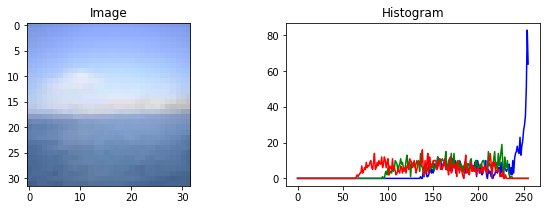

In [20]:
draw_color_histogram_from_image('adriatic_s_001807.png')

STEP 1. 아이디어 개요
자, 그럼 이제 설계를 한번 해봅시다!

우리가 만들 결과물은 histogram_search.py라는 Python 파일이고, 이 파일은 이미지 파일 경로 하나를 명령줄에서 입력으로 받아, 검색 대상 이미지들 중 비슷한 이미지들을 골라 화면에 표시하는 기능을 수행한다고 생각해봅시다. 이런 생각을 어떻게 동작하는 코드로써 구체화시킬 수 있을까요?

원하는 모든 부분이 명확해질 때까지 계속 스스로에게 질문하고, 직접 답을 찾는 방식으로 진행해봅시다. 우선 위에 정의한 기능에 있어서 가장 핵심적인 질문이라면, 아무래도 '비슷한 이미지'라는 개념을 어떻게 컴퓨터가 이해하도록 표현하느냐일 겁니다.

이미지의 유사성을 정의하고 측정하는 방법에는 무한한 방법이 있을 수 있겠지만, 오늘 우리는 위에서 배운 히스토그램이라는 개념을 통해 이미지를 서로 비교할 예정입니다. 히스토그램을 만들어주는 함수 cv2.calcHist()와 마찬가지로, 히스토그램끼리의 유사성을 계산해주는 기능 역시 OpenCV에서 제공해주는 cv2.compareHist()라는 함수를 사용해서 해결할 겁니다.

그럼 나머지 작은 기술적인 질문들이 남습니다. 이미지 파일 경로를 명령줄에서 입력으로 받는 것은 어떻게 하지? sys.argv를 사용하면 됩니다. 검색 대상 이미지는 어디서 가져오지? 위에서 준비했던 CIFAR-100 이미지들을 사용해봅시다.

기능에 대한 질문들이 어느 정도 해소가 되었다면, 이제 코드의 구조에 대해서 생각해 볼 차례입니다. 직접 코드를 짜기 전에 우선 사람의 말로 한번 pseudo-code를 짜봅시다. 아울러 처음부터 모든 세세한 부분까지 다 잡아내려 하지 말고, 우선은 큼직한 흐름부터 잡아낸 뒤에, 여러 번 반복을 거쳐서 살을 붙여 나갑시다.

위의 기능을 토대로 한번 간단한 작동 순서를 생각하면 다음과 같이 정리해 볼 수 있을 겁니다.

프로그램이 실행된다.
입력된 경로의 이미지 파일을 불러온다.
검색 대상 이미지들 중 불러온 이미지와 가장 비슷한 이미지 5개를 표시한다.
프로그램이 종료된다.
STEP 2. 아이디어 구체화
위의 내용을 어떻게 더 구체화할 수 있을까요? 일단 이미지 5개를 표시하기 위해서는 그 이미지 5개를 선택해야 합니다. 당장은 의미 없어 보일지 몰라도 이렇게 아주 조금씩이라도 생각을 진행해나갑시다.

프로그램이 실행된다.
입력된 경로의 이미지 파일을 불러온다.
검색 대상 이미지들 중 불러온 이미지와 가장 비슷한 이미지 5개를 고른다.
고른 이미지들을 표시한다.
프로그램이 종료된다.
다시 여태 나온 과정을 뚫어져라 쳐다보면, 가운데의 "가장 비슷한 이미지 5개 고르기"만 가장 복잡하고 구체화되지 않았다는 느낌이 강하게 옵니다. 이 줄을 어떻게 더 쪼갤 수 있을까요?

우선 입력된 경로의 이미지를 불러온 것처럼, 검색 대상 이미지들도 결국 불러와야 비교할 수 있을 것 같습니다. 또한 가장 비슷한 이미지 5개를 고르려면, 유사도를 어떻게든 숫자로 표현한 뒤, 순서를 매기고 위에서부터 자르면 될 것 같습니다.

프로그램이 실행된다.
입력된 경로의 이미지 파일을 불러온다.
검색 대상 이미지들 중 불러온 이미지와 가장 비슷한 이미지 5개를 고른다.
검색 대상 이미지들을 불러온다.
입력 이미지와 비교하여 유사도를 기준으로 순서를 매긴다.
유사도 순서상으로 상위 5개 이미지를 고른다.
고른 이미지들을 표시한다.
프로그램이 종료된다.
STEP 3. 핵심 알고리즘 - 유사도 계산 방법
자, 한 걸음 더 구체적으로 만들어봅시다. 유사도를 기준으로 순서를 매기려면 결국 유사도를 계산해야 합니다.

프로그램이 실행된다.

입력된 경로의 이미지 파일을 불러온다.

검색 대상 이미지들 중 불러온 이미지와 가장 비슷한 이미지 5개를 고른다.

검색 대상 이미지들을 불러온다.
입력 이미지와 비교하여 유사도를 기준으로 순서를 매긴다.
입력 이미지와 검색 대상 이미지들 사이의 유사도를 계산한다.
계산된 유사도를 기준으로 정렬하여 순서를 매긴다.
유사도 순서상으로 상위 5개 이미지를 고른다.
고른 이미지들을 표시한다.

프로그램이 종료된다.

그리고 우리는 유사도를 히스토그램끼리 비교할 것이고, 여기에는 OpenCV의 기능을 사용할 예정이라고 했습니다.

프로그램이 실행된다.

입력된 경로의 이미지 파일을 불러온다.

검색 대상 이미지들 중 불러온 이미지와 가장 비슷한 이미지 5개를 고른다.

검색 대상 이미지들을 불러온다.
입력 이미지와 비교하여 유사도를 기준으로 순서를 매긴다.
입력 이미지와 검색 대상 이미지들 사이의 유사도를 계산한다.
입력 이미지와 검색 대상 이미지들을 하나하나 히스토그램으로 만든다.
OpenCV의 compareHist() 함수를 사용하여 입력 이미지와 검색 대상 이미지 하나하나의 히스토그램 간 유사도를 계산한다.
계산된 유사도를 기준으로 정렬하여 순서를 매긴다.
유사도 순서상으로 상위 5개 이미지를 고른다.
고른 이미지들을 표시한다.

프로그램이 종료된다.

STEP 4. 기능의 모듈화
짠! 이제 우리가 무엇을 구현할지 충분히 구체화된 것 같습니다. 구상이 끝났으니 한번 깔끔하게 정리해 봅시다.

프로그램이 실행된다.
입력된 경로의 이미지 파일을 불러온다.
검색 대상 이미지들을 불러온다.
입력 이미지를 히스토그램으로 만든다.
검색 대상 이미지들을 하나하나 히스토그램으로 만든다.
OpenCV의 compareHist() 함수를 사용하여 입력 이미지와 검색 대상 이미지 하나하나의 히스토그램 간 유사도를 계산한다.
계산된 유사도를 기준으로 정렬하여 순서를 매긴다.
유사도 순서상으로 상위 5개 이미지를 고른다.
고른 이미지들을 표시한다.
프로그램이 종료된다.
우리의 설계가 좀 더 코드스러워지도록, 유관한 단계들을 묶어 함수들로 만들어봅시다.

프로그램이 실행된다.
입력된 경로의 이미지 파일을 불러온다.
입력 이미지를 히스토그램으로 만든다.
build_histogram_db()
검색 대상 이미지들을 불러온다.
검색 대상 이미지들을 하나하나 히스토그램으로 만든다.
search()
OpenCV의 compareHist() 함수를 사용하여 입력 이미지와 검색 대상 이미지 하나하나의 히스토그램 간 유사도를 계산한다.
계산된 유사도를 기준으로 정렬하여 순서를 매긴다.
유사도 순서상으로 상위 5개 이미지를 고른다.
고른 이미지들을 표시한다.
프로그램이 종료된다.
자, 여기서 조금 더 원활한 실습을 위해, 우리의 설계가 조금 더 단순해지도록 기능을 살짝 제한해 보겠습니다. 아무 이미지나 입력받는 게 아니라, 검색 대상이었던 CIFAR-100 이미지 중 하나의 이름을 입력받는 것으로 대체해 봅시다.

프로그램이 실행된다.
build_histogram_db()
CIFAR-100 이미지들을 불러온다.
CIFAR-100 이미지들을 하나하나 히스토그램으로 만든다.
CIFAR-100 히스토그램 중 입력된 이미지 이름에 해당하는 히스토그램을 입력 이미지로 선택한다.
search()
OpenCV의 compareHist() 함수를 사용하여 입력 이미지와 검색 대상 이미지 하나하나의 히스토그램 간 유사도를 계산한다.
계산된 유사도를 기준으로 정렬하여 순서를 매긴다.
유사도 순서상으로 상위 5개 이미지를 고른다.
고른 이미지들을 표시한다.
프로그램이 종료된다.
STEP 5. 설계 과정 완성
그럼 마지막 단계로, 각 함수에 입력되고 반환될 데이터의 형태와 변수명을 한번 정해봅시다.

프로그램이 실행된다.
build_histogram_db()
CIFAR-100 이미지들을 불러온다.
CIFAR-100 이미지들을 하나하나 히스토그램으로 만든다.
이미지 이름을 키로 하고, 히스토그램을 값으로 하는 딕셔너리 histogram_db를 반환한다.
CIFAR-100 히스토그램 중 입력된 이미지 이름에 해당하는 히스토그램을 입력 이미지로 선택하여 target_histogram이라는 변수명으로 지정한다.
search()
입력 이미지 히스토그램 target_histogram와 전체 검색 대상 이미지들의 히스토그램을 가진 딕셔너리 histogram_db를 입력으로 받는다.
OpenCV의 compareHist() 함수를 사용하여 입력 이미지와 검색 대상 이미지 하나하나의 히스토그램 간 유사도를 계산한다. 결과는 result라는 이름의 딕셔너리로, 키는 이미지 이름, 값은 유사도로 한다.
계산된 유사도를 기준으로 정렬하여 순서를 매긴다.
유사도 순서상으로 상위 5개 이미지만 골라서 result에 남긴다.
고른 이미지들을 표시한다.
프로그램이 종료된다.
STEP 6. 코드로 구현
여기까지 해서 설계 과정이 끝났습니다. 🥳

따라오기 어렵거나 쉽게 이해되지 않는 부분이 있었다 하더라도, 우리는 처음이기에 걱정할 필요는 없습니다. 사람마다 사고방식도 물론 다르고, 또한 무엇보다 어느 부분을 어떻게 구체화해야 하는지, 어떤 부분을 함수로 묶고 어떻게 데이터로 표현할지는 많은 연습이 필요하기 때문입니다. 따라서 우리 실습의 마무리도 위 내용을 직접 처음부터 코드를 구현하는 것이 아닌, 위 설계에 따라 이미 어느 정도 쓰여진 코드의 빈칸을 완성하는 형태로 진행할 예정입니다.

그럼 위 설계된 내용을 하나씩 진행해 봅시다. 우선 build_histogram_db() 를 구현해 볼 텐데, 지난 스텝에서 이미지를 특정 디렉토리에 모두 모아 둔 바 있습니다. 그 디렉토리에 있는 모든 이미지 파일을 대상으로 히스토그램을 만들어야 하는데, 우선 이미지 파일 1개에 대해 히스토그램을 만드는 함수를 만들어 보면 좋겠습니다. 이때, 위에서 언급한 것처럼 단순화의 측면에서 이를 4개 구간(0~63, 64~127, 128~191, 192~255)로 나누어 픽셀 수를 세기로 한 바 있습니다. 이를 감안하여 다음과 같이 함수를 만듭니다.

In [23]:
def get_histogram(image):
    histogram = []

    # Create histograms per channels, in 4 bins each.
    for i in range(3):
        channel_histogram = cv2.calcHist(images=[image],
                                         channels=[i],
                                         mask=None,
                                         histSize=[4],  # 히스토그램 구간을 4개로 한다.
                                         ranges=[0, 256])
        histogram.append(channel_histogram)  

    histogram = np.concatenate(histogram)
    histogram = cv2.normalize(histogram, histogram)

    return histogram

In [24]:
# get_histogram() 확인용 코드
filename = train[b'filenames'][0].decode()
file_path = os.path.join(images_dir_path, filename)
image = cv2.imread(file_path)
histogram = get_histogram(image)
histogram

array([[0.3126804 ],
       [0.4080744 ],
       [0.14521089],
       [0.21940625],
       [0.18654831],
       [0.23742512],
       [0.30208108],
       [0.35931748],
       [0.06465594],
       [0.35825753],
       [0.36991683],
       [0.29254165]], dtype=float32)

In [25]:
def build_histogram_db():
    histogram_db = {}

    #디렉토리에 모아 둔 이미지 파일들을 전부 리스트업합니다. 
    path = images_dir_path
    file_list = os.listdir(images_dir_path)

    for file_name in tqdm(file_list):
        file_path = os.path.join(images_dir_path, file_name)
        image = cv2.imread(file_path)

        histogram = get_histogram(image)

        histogram_db[file_name] = histogram

    return histogram_db

In [26]:
histogram_db = build_histogram_db()
histogram_db['adriatic_s_001807.png']

100%|██████████| 49999/49999 [00:04<00:00, 10473.79it/s]


array([[0.        ],
       [0.        ],
       [0.29744893],
       [0.5828624 ],
       [0.        ],
       [0.17107612],
       [0.41608465],
       [0.29315054],
       [0.        ],
       [0.34301192],
       [0.37224102],
       [0.16505837]], dtype=float32)

In [27]:
def get_target_histogram():
    filename = input("이미지 파일명을 입력하세요: ")
    if filename not in histogram_db:
        print('유효하지 않은 이미지 파일명입니다.')
        return None
    return histogram_db[filename]

In [33]:
target_histogram = get_target_histogram()
target_histogram

이미지 파일명을 입력하세요: adriatic_s_001807.png


array([[0.        ],
       [0.        ],
       [0.29744893],
       [0.5828624 ],
       [0.        ],
       [0.17107612],
       [0.41608465],
       [0.29315054],
       [0.        ],
       [0.34301192],
       [0.37224102],
       [0.16505837]], dtype=float32)

In [34]:
def search(histogram_db, target_histogram, top_k=5):
    results = {}

    # Calculate similarity distance by comparing histograms.
    for file_name, histogram in tqdm(histogram_db.items()):
        distance = cv2.compareHist(H1=target_histogram,
                                   H2=histogram,
                                   method=cv2.HISTCMP_CHISQR)

        results[file_name] = distance

    results = dict(sorted(results.items(), key=lambda item: item[1])[:top_k])

    return results

In [35]:
result = search(histogram_db, target_histogram)
result

100%|██████████| 49999/49999 [00:00<00:00, 661482.14it/s]


{'adriatic_s_001807.png': 0.0,
 'baby_s_001654.png': 0.047506706444185816,
 'fogbank_s_000423.png': 0.059270738493642845,
 'tank_s_000442.png': 0.060966690827361725,
 'dessert_plate_s_000124.png': 0.06113711905561663}

In [36]:
def show_result(result):
    f=plt.figure(figsize=(10,3))
    for idx, filename in enumerate(result.keys()):    
        img_path = os.path.join(images_dir_path, filename)
        im = f.add_subplot(1,len(result),idx+1)
        img = Image.open(img_path)
        im.imshow(img)

이미지 파일명을 입력하세요: adriatic_s_001807.png


100%|██████████| 49999/49999 [00:00<00:00, 698678.03it/s]


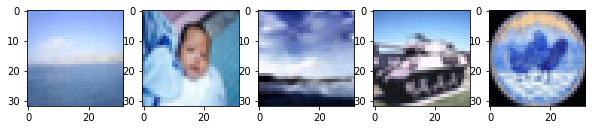

In [37]:
target_histogram = get_target_histogram()
result = search(histogram_db, target_histogram)
show_result(result)